In [5]:
#Selenium imports here
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

In [6]:
#Other imports here 
import os
from bs4 import BeautifulSoup
# The datetime module supplies classes for manipulating dates and times
from datetime import date, timedelta
import time
from datetime import datetime
import pandas as pd

import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [7]:
import sklearn
from sklearn import cluster

from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [10]:
# investpy is a Python package to retrieve data from Investing.com
# investpy allows the user to download both recent and historical data from all the financial products indexed at Investing.com. It includes data from all over the world
import investpy

In [5]:
# gets a list of dates and converts the list to a list of strings
def creat_list_str_dates(list_dates):
    new_list_dats = list()
    
    for d in list_dates:
        date = str(d.year) + '-'
        if d.month < 10:
            date += '0' + str(d.month) + '-'
        else:
            date += str(d.month) + '-'
        if d.day < 10:
            date += '0' + str(d.day)
        else:
            date += str(d.day)
        new_list_dats.append(date)  
    return new_list_dats

In [6]:
# mean_list function gets a series and returns it's avg
def mean_list(list_check):
    sum_ = 0
    for var in list_check:
        sum_ += var
    return sum_ / len(list_check)

# compere_len_list_to_df function gets a list and number of rows in the dataframe and checks if their sizes are equal
# compere_len_list_to_df function gets a list and numbers of rows in a dataframe
# if the the length of the list is bigger then the number of rows then while they are not equal pop the last node
# if the length of the list is smaller then the number of rows the parameter mean_temp gets the avg of the list
def compere_len_list_to_df(list_check,df_shape_0):
    if len(list_check) > df_shape_0:
        
        while len(list_check) != df_shape_0: 
            list_check.pop()
            
    elif len(list_check) < df_shape_0:
        
        mean_temp = mean_list(list_check)
        while len(list_check) != df_shape_0: 
            list_check.append(mean_temp)
            
# load_list_to_df function gets a list that contains all the data from the previous crawling stage
# in addition gets a parameter (i) that dictates if the the function was summoned before and another parameter which is the city 
def load_list_to_df(list_, i, city):
    df['Avg Temp ' + city] = list_[0][:len_dats_list - i]
    df['Wind Speed ' + city] = list_[1][:len_dats_list - i]
    df['Humidity ' + city] = list_[2][:len_dats_list - i]
    df['Pressure ' + city] = list_[3][:len_dats_list - i]
    df['Precipitation ' + city] = list_[4][:len_dats_list - i]
    
# clear_list function clears the contents of the list which was given to the function
def clear_list(list_):
    for l in list_:
        l.clear()
        

In [7]:
# The IQR or Inter Quartile Range is a statistical measure used to measure the 
# variability in a given data. In naive terms, it tells us inside what range the 
# bulk of our data lies. It can be calculated by taking the difference between the 
# third quartile and the first quartile within a dataset.
def return_IQR_Q1_Q3(list_):
        Q1 = np.percentile(list_, 25)
        Q3 = np.percentile(list_, 75)
        IQR = Q3 - Q1
        return IQR,Q1,Q3

#  mean_weak_ago function gets row col
# if row > 7 then the function returns the avg of the previous week (Series)
# if row < 7 then the function returns the avg of of the current Series 
def mean_weak_ago(row, col):
    sum_ = 0
    
    counter = 1

    if row > 7:
        for index in range(7):
            sub = row - index
            sum_ += df.iloc[row - sub: row - sub + 1, col: col+ 1].values[0][0] 
    else:
        print(f" (r,c): {row,col} valu {df.iloc[row: row + 1, col: col+ 1].values[0][0] } replace with: {df.iloc[:,col:col +1].mean().values[0]}\n")
        return df.iloc[:,col:col +1].mean().values[0]
    
    print(f" (r,c): {row,col} valu {df.iloc[row: row + 1, col: col+ 1].values[0][0] } replace with: {sum_ / 7}\n")
    return sum_ / 7

# chang_outliers function gets a list of outliers indexes and the col where the outlier was found 
# the function changes the outliers to the avg(mean) of the previous week (Series )
def chang_outliers(list_, col):
    for row in list_:
#         print(f"row = {row}\ncol = {col}") Humidity
        df.iloc[row:row+1,col:col+1] = mean_weak_ago(row, col)
# normalize function gets a dataframe and normalizes it
def normalize(df):
    for feature_name in df.columns:
        if len(df[(df[feature_name] != 0 )].index):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        

In [8]:
d1 = date(1990,1,1)
d2 = date(2005,1,1)

# this will give you a list containing all of the dates
dd = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)]
dats_list = creat_list_str_dates(dd)

# this will give you a list containing all of the month
date_per_month_list = list()
per1 = pd.date_range(start =d1, end =d2, freq ='M')
  
for val in per1:
    date_per_month_list.append(val)
# print(f"dats_list: {len(dats_list)}\ndate_per_month_list: {len(date_per_month_list)}")


In [11]:
# city_list is a list that contains all the cities that are reviewed in the project
city_list = ['Montgomery','Juneau','Phoenix','Little Rock','Sacramento','Hartford','Dover','Tallahassee','Atlanta','Honolulu','Boise','Springfield','Indianapolis','Des Moines','Topeka','Frankfort','Baton Rouge','Augusta','Annapolis','Boston','Lansing','St. Paul','Jackson','Jefferson City','Helena','Lincoln','Carson City','Concord','Trenton','Santa Fe','Albany','Raleigh','Bismarck','Columbus','Oklahoma City','Salem','Harrisburg','Providence','Columbia','Pierre','Nashville','Austin','Salt Lake City','Montpelier','Richmond','Olympia','Charleston','Madison','Cheyenne']
# BaseApi_city_by_country is a list that contains base url for the crawling process
BaseApi_city_by_country = ['https://www.wunderground.com/history/monthly/us/al/hope-hull/KMGM/date/','https://www.wunderground.com/history/monthly/us/ak/juneau/PAJN/date/','https://www.wunderground.com/history/monthly/us/az/phoenix/KPHX/date/','https://www.wunderground.com/history/monthly/us/ar/little-rock/KLIT/date/','https://www.wunderground.com/history/monthly/us/ca/sacramento/KSMF/date/','https://www.wunderground.com/history/monthly/us/ct/windsor-locks/KBDL/date/','https://www.wunderground.com/history/monthly/us/de/new-castle/KILG/date/','https://www.wunderground.com/history/monthly/us/fl/tallahassee/KTLH/date/','https://www.wunderground.com/history/monthly/us/ga/atlanta/KATL/date/','https://www.wunderground.com/history/monthly/us/hi/honolulu/PHNL/date/','https://www.wunderground.com/history/monthly/us/id/boise/KBOI/date/','https://www.wunderground.com/history/monthly/us/il/springfield/KSPI/date/','https://www.wunderground.com/history/monthly/us/in/indianapolis/KIND/date/','https://www.wunderground.com/history/monthly/us/ia/des-moines/KDSM/date/','https://www.wunderground.com/history/monthly/us/ks/berryton/KFOE/date/','https://www.wunderground.com/history/monthly/us/ky/lexington/KLEX/date/','https://www.wunderground.com/history/monthly/us/la/baton-rouge/KBTR/date/','https://www.wunderground.com/history/monthly/us/me/augusta/KAUG/date/','https://www.wunderground.com/history/monthly/us/md/baltimore/KBWI/date/','https://www.wunderground.com/history/monthly/us/ma/boston/KBOS/date/','https://www.wunderground.com/history/monthly/us/mi/lansing/KLAN/date/','https://www.wunderground.com/history/monthly/us/mn/minneapolis/KMSP/date/','https://www.wunderground.com/history/monthly/us/ms/pearl/KJAN/date/','https://www.wunderground.com/history/monthly/us/mo/columbia/KCOU/date/','https://www.wunderground.com/history/monthly/us/mt/helena/KHLN/date/','https://www.wunderground.com/history/monthly/us/ne/lincoln/KLNK/date/','https://www.wunderground.com/history/monthly/us/nv/reno/KRNO/date/','https://www.wunderground.com/history/monthly/us/nh/manchester/KMHT/date/','https://www.wunderground.com/history/monthly/us/nj/ewing-township/KTTN/date/','https://www.wunderground.com/history/monthly/us/nm/santa-fe/KSAF/date/','https://www.wunderground.com/history/monthly/us/ny/latham/KALB/date/','https://www.wunderground.com/history/monthly/us/nc/morrisville/KRDU/date/','https://www.wunderground.com/history/monthly/us/nd/bismarck/KBIS/date/','https://www.wunderground.com/history/monthly/us/oh/columbus/KCMH/date/','https://www.wunderground.com/history/monthly/us/ok/oklahoma-city/KOKC/date/','https://www.wunderground.com/history/monthly/us/or/salem/KSLE/date/','https://www.wunderground.com/history/monthly/us/pa/middletown/KMDT/date/','https://www.wunderground.com/history/monthly/us/ri/warwick/KPVD/date/','https://www.wunderground.com/history/monthly/us/sc/west-columbia/KCAE/date/','https://www.wunderground.com/history/monthly/us/sd/pierre/KPIR/date/','https://www.wunderground.com/history/monthly/us/tn/nashville/KBNA/date/','https://www.wunderground.com/history/monthly/us/tx/austin/KAUS/date/','https://www.wunderground.com/history/monthly/us/ut/salt-lake-city/KSLC/date/','https://www.wunderground.com/history/monthly/us/vt/south-burlington/KBTV/date/','https://www.wunderground.com/history/monthly/us/va/henrico/KRIC/date/','https://www.wunderground.com/history/monthly/us/wa/seatac/KSEA/date/','https://www.wunderground.com/history/monthly/us/wv/charleston/KCRW/date/','https://www.wunderground.com/history/monthly/us/wi/madison/KMSN/date/','https://www.wunderground.com/history/monthly/us/wy/cheyenne/KCYS/date/']
city_list.remove('Austin')
BaseApi_city_by_country.remove('https://www.wunderground.com/history/monthly/us/tx/austin/KAUS/date/')
# prints the length of the lists city_list,BaseApi_city_by_country
print(f"len city: {len(city_list)}\nlen url: {len(BaseApi_city_by_country)}")

In [11]:
df = pd.DataFrame({})

In [12]:
driver = webdriver.Chrome()
driver.set_page_load_timeout(10000)

In [10]:
# Avg_Temperature,Wind_Speed,date_list,Humidity_list,Pressure_list,Precipitation_list are lists containing the values of of the parameters
# arr_list is an array that contains the lists mentioned above 
# Round_flag is a parameter designed to indicate whether this is the first iteration 
# first for loop runs on two parameters index,bace_url which travel on the baseApi_ and city_by_country
#second for loop uses parameter  date to travel the contents(dates) that date_per_month_list contains
# the second for loop details the time delay between crawling one page and moving to next and, current_url contains the address that we are crawling on currently
# the parameter mtag mentioned in the while loop details whether the page was fully loaded if not he calls the page again and increases the wate time
# the table paramteter is a chart containing the values that we desire
# the 'tr' tag represents a series inside the table(chart)
# the 'td' tage represents a row inside of the 'tr' series
# the following lists: Precipitation_table,Pressure_Hg_table, Humidity_prsent_table, Wind_Speed_mph_table,Temperature_F_table contain the contents of the table

Avg_Temperature = []
Wind_Speed = []
date_list = []
Humidity_list =[]
Pressure_list = []
Precipitation_list = []

arr_list = [Avg_Temperature, Wind_Speed, Humidity_list, Pressure_list, Precipitation_list]

Round_flag = 0

for index_city,bace_url in enumerate(BaseApi_city_by_country):
    city = city_list[index_city]
    for date in date_per_month_list:
        time_wate = 3
        year = date.year
        month = date.month
        
        curnt_url = bace_url + str(year) + '-' + str(month)
        driver.get(curnt_url)
        time.sleep(time_wate)    
        html=driver.page_source
        
        soup=BeautifulSoup(html,'html.parser')
        mtag = soup.findAll("tbody")
        
        while len(mtag) < 6:
            print(f"city: {city}\nstop in: {year}/{month} \nlen(mtag): {len(mtag)}\ntime_wate: {time_wate}\n ")
            time_wate += 1
            driver.get(curnt_url)
            time.sleep(time_wate)    
            html=driver.page_source
           
            soup=BeautifulSoup(html,'html.parser')
            mtag = soup.findAll("tbody")
    
        table = mtag[5].findAll("table")
        
        Precipitation_table = table[6].findAll("tr")
        Pressure_Hg_table = table[5].findAll("tr")
        Humidity_prsent_table = table[3].findAll("tr")
        Wind_Speed_mph_table = table[4].findAll("tr")
        Temperature_F_table = table[1].findAll("tr")
        days_number = len(Temperature_F_table)
#         print(f"days_number: {days_number}\n")
        
        for index in range(1,days_number):# days_number + 1 ????
            Avg_Temp = Temperature_F_table[index].findAll("td")[1].getText()
            Avg_Speeed = Wind_Speed_mph_table[index].findAll("td")[1].getText()
            Avg_Humidity = Humidity_prsent_table[index].findAll("td")[1].getText()
            Avg_Pressure = Pressure_Hg_table[index].findAll("td")[1].getText()
            Precipitation = Precipitation_table[index].findAll("td")[0].getText()
            
#             print(f"index: {index} in moth: {month}")
            
            Avg_Temperature.append(float(Avg_Temp))
            Wind_Speed.append(float(Avg_Speeed))
            Humidity_list.append(float(Avg_Humidity))
            Pressure_list.append(float(Avg_Pressure))
            Precipitation_list.append(float(Precipitation))
   
    print(f"city: {city} numbe: {index_city}\nsize Avg_Temperature :{len(Avg_Temperature)}\nsize Wind_Speed :{len(Wind_Speed)}\nsize Humidity_list :{len(Humidity_list)}\nsize Pressure_list :{len(Pressure_list)}-----> month: {month}\n\n")
    
    len_dats_list = len(dats_list)
#     print(df)
    
    if Round_flag == 0:
        Round_flag = 1
        load_list_to_df(arr_list, 1,city)
    else:
        df_row = df.shape[0]
        for lis in arr_list:
            compere_len_list_to_df(lis, df_row)
        load_list_to_df(arr_list, 0,city)   
    
#     print("brik!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
#     time.sleep(10)  
    clear_list(arr_list)


In [86]:
# saves the dataframe
# df.to_csv('df_15_yers.csv')

# reads the dataframe
df = pd.read_csv('df_after_merge_1990_2020.csv', header=0, sep=',') 
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [87]:
# df2 is a dataframe that contains the same amount of dates that we crawled on 
df2 = pd.DataFrame({'Date_' : dats_list[:df.shape[0]] })

In [88]:
# merge  df and df2
for index,col in enumerate(df.columns[1:]):
    df2[col] = df[col]


moth_list = list()
yers_list = list()

# create a  list of month and year
for date_ in dd:
    moth_list.append(date_.month)
    yers_list.append(date_.year)


In [89]:
df = df2
# adds the the following columns : Month,Year to the dataframe
df['Month'] = moth_list[:df.shape[0]]
df['Year'] = yers_list[:df.shape[0]]
df
# df.drop(['Unnamed: 0'], axis=1, inplace = True)
df


,Date_,Avg Temp Montgomery,Wind Speed Montgomery,Humidity Montgomery,Pressure Montgomery,Precipitation Montgomery,Avg Temp Juneau,Wind Speed Juneau,Humidity Juneau,Pressure Juneau,...,Wind Speed Madison,Humidity Madison,Pressure Madison,Precipitation Madison,Avg Temp Cheyenne,Wind Speed Cheyenne,Humidity Cheyenne,Pressure Cheyenne,Precipitation Cheyenne,Month
0,1990-01-01,41.2,8.7,67.8,30.1,0.0,15.8,8.8,56.1,28.7,...,12.5,71.4,29.2,0.0,36.50000,13.500000,47.300000,23.900000,0.0,1
1,1990-01-02,41.3,3.1,66.0,30.2,0.0,14.0,6.0,64.9,28.8,...,11.8,78.3,29.1,0.0,35.00000,13.300000,48.200000,23.700000,0.0,1
2,1990-01-03,50.8,5.4,60.1,30.1,0.0,17.5,2.9,67.9,29.8,...,11.7,72.4,29.0,0.0,20.80000,16.900000,60.800000,23.900000,0.0,1
3,1990-01-04,41.5,5.2,70.0,29.9,0.0,19.6,0.6,89.3,29.7,...,10.2,62.0,29.0,0.0,22.80000,16.500000,46.800000,24.100000,0.0,1
4,1990-01-05,37.1,5.3,60.3,29.9,0.0,24.6,3.0,85.4,29.1,...,7.6,65.4,29.2,0.0,27.50000,19.600000,54.000000,24.100000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,2004-12-01,42.8,2.4,55.2,30.3,0.0,31.0,18.0,91.1,29.7,...,7.8,75.0,29.6,0.0,39.50000,10.400000,48.700000,23.900000,0.0,12
5449,2004-12-02,43.3,3.3,60.8,30.3,0.0,31.8,6.3,92.9,29.4,...,6.6,74.6,29.2,0.0,37.20000,7.600000,61.300000,23.800000,0.0,12
5450,2004-12-03,50.0,1.5,68.8,30.2,0.0,20.9,10.0,51.3,30.0,...,3.1,86.8,29.3,0.0,37.00000,23.100000,50.600000,23.700000,0.0,12
5451,2004-12-04,51.8,3.3,73.8,30.1,0.0,17.2,9.7,40.1,30.3,...,10.9,90.3,28.9,0.0,37.50000,9.000000,43.100000,23.800000,0.0,12


In [90]:
# Using investpy to get the data from Investing.com about wheat and oil

# data of wheat
search_result = investpy.search_quotes(text='ZW', products=['commodities'], countries=['united states'], n_results=1)
WheatData = search_result.retrieve_historical_data(from_date='01/01/2005', to_date='01/01/2020')

# create col of avg and delete the following cols : 'Open','High','Low','Close','Volume','Change Pct' 
WheatData["avag"] = (WheatData["Open"]+WheatData["Close"])/2
WheatData.drop(axis=1, columns=['Open','High','Low','Close','Volume','Change Pct'], inplace = True)
WheatData

# create a dataframe of dates and the average price of wheat
list_ZW = creat_list_str_dates(WheatData.index)
df_Wheath = pd.DataFrame({"Date_" : list_ZW,"Wheath Avag" : WheatData['avag'] })
# df_Wheath

# data of oil
oil_results = investpy.search_quotes(text='WTI', products=['commodities'], countries=['united states'], n_results=1)
OilData = oil_results.retrieve_historical_data(from_date='01/01/2005', to_date='01/01/2020')

# create a col of avg and drop the following cols: 'Open','High','Low','Close','Volume','Change Pct' 
OilData['oil_avag'] = (OilData['Open'] +OilData['Close'])/2
OilData.drop(axis=1, columns=['Open','High','Low','Close','Volume','Change Pct'], inplace = True)

# create a dataframe of date and the avg price of wheat
list_Oil = creat_list_str_dates(OilData.index)
df_Oil = pd.DataFrame({"Date_" : list_Oil,"Oil Avag" : OilData['oil_avag'] })
# df_Oil

In [91]:
# merge both df_Wheath and df_Oil to one dataframe called 'DateBeforeProces' whether a row  will appear in the newly formed dataframe depends on whether the date of said rows existed in both dataframes to begin with.

# also merge both DateBeforeProces and df to redefine  'DateBeforeProces'  whether a row  will appear in the newly formed dataframe depends on whether the date of said rows existed in both dataframes to begin with.
DateBeforeProces = pd.merge(df_Wheath,df_Oil,on = 'Date_')
DateBeforeProces = pd.merge(DateBeforeProces,df,on = 'Date_')
DateBeforeProces

,Date_,Wheath Avag,Oil Avag,Avg Temp Montgomery,Wind Speed Montgomery,Humidity Montgomery,Pressure Montgomery,Precipitation Montgomery,Avg Temp Juneau,Wind Speed Juneau,...,Wind Speed Madison,Humidity Madison,Pressure Madison,Precipitation Madison,Avg Temp Cheyenne,Wind Speed Cheyenne,Humidity Cheyenne,Pressure Cheyenne,Precipitation Cheyenne,Month
0,1990-01-02,408.500,22.350,41.3,3.1,66.0,30.2,0.0,14.0,6.0,...,11.8,78.3,29.1,0.0,35.0,13.3,48.2,23.7,0.0,1
1,1990-01-03,408.875,23.435,50.8,5.4,60.1,30.1,0.0,17.5,2.9,...,11.7,72.4,29.0,0.0,20.8,16.9,60.8,23.9,0.0,1
2,1990-01-04,409.625,23.655,41.5,5.2,70.0,29.9,0.0,19.6,0.6,...,10.2,62.0,29.0,0.0,22.8,16.5,46.8,24.1,0.0,1
3,1990-01-05,409.000,23.245,37.1,5.3,60.3,29.9,0.0,24.6,3.0,...,7.6,65.4,29.2,0.0,27.5,19.6,54.0,24.1,0.0,1
4,1990-01-08,410.625,22.080,38.0,9.8,75.1,29.8,0.0,27.8,9.0,...,9.7,75.6,28.7,0.0,43.7,29.2,47.9,23.6,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,2004-11-29,289.750,49.580,38.3,4.8,61.2,29.9,0.0,23.6,3.7,...,8.2,75.7,29.1,0.0,35.8,9.7,43.0,23.9,0.0,11
3713,2004-11-30,288.875,49.390,43.0,8.4,47.2,30.0,0.0,21.1,0.9,...,6.3,80.0,29.5,0.0,39.1,6.4,42.8,23.9,0.0,11
3714,2004-12-01,287.750,47.280,42.8,2.4,55.2,30.3,0.0,31.0,18.0,...,7.8,75.0,29.6,0.0,39.5,10.4,48.7,23.9,0.0,12
3715,2004-12-02,285.250,44.370,43.3,3.3,60.8,30.3,0.0,31.8,6.3,...,6.6,74.6,29.2,0.0,37.2,7.6,61.3,23.8,0.0,12


In [9]:
# drop duplicates rows and nan valus

DateBeforeProces = DateBeforeProces.dropna()
DateBeforeProces = DateBeforeProces.drop_duplicates()

In [94]:
# save the list of month, list of yers after clinhng and merge the ralvent mech rows
# creating list_of_month parameter to hold the series 'month' from the dataframe 'DateBeforeProces'
# creating list_of_yers parameter to hold the series 'Year' from the dataframe 'DateBeforeProces'
# after cleaning and merging the relevant matching rows
list_of_month = DateBeforeProces['Month']
list_of_yers = DateBeforeProces['Year']

# drop both the 'month' series and the 'Year' seires after saving them, in order to manipulate the values 
DateBeforeProces.drop(['Month'], axis=1, inplace = True)
DateBeforeProces.drop(['Year'], axis=1, inplace = True)

DateBeforeProces


,Date_,Wheath Avag,Oil Avag,Avg Temp Montgomery,Wind Speed Montgomery,Humidity Montgomery,Pressure Montgomery,Precipitation Montgomery,Avg Temp Juneau,Wind Speed Juneau,...,Avg Temp Madison,Wind Speed Madison,Humidity Madison,Pressure Madison,Precipitation Madison,Avg Temp Cheyenne,Wind Speed Cheyenne,Humidity Cheyenne,Pressure Cheyenne,Precipitation Cheyenne
0,1990-01-02,408.500,22.350,41.3,3.1,66.0,30.2,0.0,14.0,6.0,...,27.5,11.8,78.3,29.1,0.0,35.0,13.3,48.2,23.7,0.0
1,1990-01-03,408.875,23.435,50.8,5.4,60.1,30.1,0.0,17.5,2.9,...,31.5,11.7,72.4,29.0,0.0,20.8,16.9,60.8,23.9,0.0
2,1990-01-04,409.625,23.655,41.5,5.2,70.0,29.9,0.0,19.6,0.6,...,18.3,10.2,62.0,29.0,0.0,22.8,16.5,46.8,24.1,0.0
3,1990-01-05,409.000,23.245,37.1,5.3,60.3,29.9,0.0,24.6,3.0,...,14.0,7.6,65.4,29.2,0.0,27.5,19.6,54.0,24.1,0.0
4,1990-01-08,410.625,22.080,38.0,9.8,75.1,29.8,0.0,27.8,9.0,...,30.4,9.7,75.6,28.7,0.0,43.7,29.2,47.9,23.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,2004-11-29,289.750,49.580,38.3,4.8,61.2,29.9,0.0,23.6,3.7,...,15.6,8.2,75.7,29.1,0.0,35.8,9.7,43.0,23.9,0.0
3713,2004-11-30,288.875,49.390,43.0,8.4,47.2,30.0,0.0,21.1,0.9,...,10.7,6.3,80.0,29.5,0.0,39.1,6.4,42.8,23.9,0.0
3714,2004-12-01,287.750,47.280,42.8,2.4,55.2,30.3,0.0,31.0,18.0,...,19.2,7.8,75.0,29.6,0.0,39.5,10.4,48.7,23.9,0.0
3715,2004-12-02,285.250,44.370,43.3,3.3,60.8,30.3,0.0,31.8,6.3,...,31.0,6.6,74.6,29.2,0.0,37.2,7.6,61.3,23.8,0.0


In [12]:
# insert DateBeforeProces without the first 3 cols to df, in order to manipulate the values
df =  DateBeforeProces.iloc[:,3:] 

In [13]:
# Handling the outlier values of each column using IQR 
# IQR is a statistical measure used to measure the variability in a given data
counter = 1
while counter:
    print(f"counter: {counter}###########################################################################")
    counter = 0
    for index,col in enumerate(df.columns[0:]):
#       TEMP
        if index % 5 == 0:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR )].index
            chang_outliers(outlier_rows,index)
#       SPEED Wind      
        if index % 5 == 1:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR ) | (df[col] < 0)].index
            chang_outliers(outlier_rows,index)
#       Humidity    
        if index % 5 == 2:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR ) | (df[col] < 0)].index
            chang_outliers(outlier_rows,index)
#       Pressure            
        if index % 5 == 3:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR ) | (df[col] < 0)].index
            chang_outliers(outlier_rows,index)
#       Precipitation            
        if index % 5 == 4:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR ) | (df[col] < 0)].index
            chang_outliers(outlier_rows,index)
        
        print(f"END!!!!!!!!!!!!!!!!!!!!!! index = {index}")

In [98]:
# df.to_csv('df_after_outlier.csv',date_format='%Y%m%d')

In [14]:
# df3 gets the the first 3 columns of the dataframes before processing(wheath,oil.date)
df3 = DateBeforeProces.iloc[:,:3]
# insert the values of df into df3 after taking care of the outliers
for col in df.columns:
    df3[col] = df[col]
# df3 = df3.iloc[:,1:]
df3.drop(['Date_'], axis=1, inplace = True)

In [23]:
# df3.to_csv('df_after_normalize.csv',date_format='%Y%m%d')

In [100]:
normalize_df = df3.copy()
# normalize copy of df3
normalize(normalize_df)
# puting in df the normalized values not including 'wheath' and 'oil'
df = normalize_df.iloc[:,2:]
DateBeforeProces = normalize_df

In [101]:
# zip_col function gets 2 lists, the function takes 'list_' and inserts it's values into 'zip_list' and by doing that changes 'zip_list'
def zip_col(zip_list, list_):
    for index,val in enumerate(list_):
        zip_list[index] += val 
    return zip_list

In [102]:
zip_tamp = []
zip_Wind = []
zip_Humidity = []
zip_Pressure = []
zip_Precipitation = []

In [103]:
# Performs a Regregation on all columns and puts 

# them into the 5 columns which sum all the columns,in accordance with the type of values the column represents

zip_tamp = df['Avg Temp Montgomery'].copy()
zip_Wind = df['Wind Speed Montgomery'].copy()
zip_Humidity = df['Humidity Montgomery'].copy()
zip_Pressure = df['Pressure Montgomery'].copy()
zip_Precipitation = df['Precipitation Montgomery'].copy()


for index,col in enumerate(df.columns[5:]):
    if index % 5 == 0:  #         print(col) TEMP
        zip_tamp = zip_col(zip_tamp,df[col].copy())
    if index % 5 == 1:  #         print(col) SPEED
        zip_Wind = zip_col(zip_Wind,df[col].copy())
    if index % 5 == 2:  #         print(col) Humidity
        zip_Humidity = zip_col(zip_Humidity,df[col].copy())
    if index % 5 == 3:  #         print(col) Pressure
        zip_Pressure = zip_col(zip_Pressure,df[col].copy())
    if index % 5 == 4:  #         print(col) Precipitation
        zip_Precipitation = zip_col(zip_Precipitation,df[col].copy())
print(f"END!!!!!!!!!!!!!!!!!!!!!! index = {index}")
#         print(f"IQR = {IQR}\nQ1 = {Q1}\nQ2 = {Q3}")
        

END!!!!!!!!!!!!!!!!!!!!!! index = 234


In [15]:
# creating a new dataframe called 'zip_df' with the zip columns
zip_df = pd.DataFrame({ 'zip temp' : zip_tamp, 'zip Wind Speed' : zip_Wind ,'zip Humidity' : zip_Humidity , 'zip Pressure' : zip_Pressure, 'zip Precipitation' :zip_Precipitation})

In [16]:
# normalizing the dataframe after summing up all the columns
zip_df = zip_df.divide(other = 48)

In [17]:
# adding to zip_df the normalized 'Oil Avag'
zip_df['Oil Avag'] = normalize_df['Oil Avag']

# adding the 'Month' and 'Year' to zip_df
zip_df['Month'] = list_of_month
zip_df['Year'] = list_of_yers

# adding to zip_df  the unnormalized 'Wheath Avag'
zip_df['Wheath Avag'] = df3['Wheath Avag']

In [107]:
# saving final dataframe
# zip_df.to_csv('df_final_zip.csv')

In [21]:
# splitData function gets features (array) which contains the names of the columns which we deliver to him , the function returns the parameters which we use to conduct the machine learning process with.
# train_test_split Functions for partition of data.
def splitData(features):
    
    df_try_predictors = df_try[features].values
    df_try_labels = df_try["Wheath Avag"].values

# Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(df_try_predictors, df_try_labels, random_state=1, test_size=0.7)
    return XTrain, XTest, yTrain, yTest

In [11]:
zip_df = pd.read_csv('df_final_zip.csv', header=0, sep=',') 

In [12]:
df_try = zip_df.copy()
df_try.drop(axis=1, columns=['Unnamed: 0'], inplace = True)
df_try 

,zip temp,zip Wind Speed,zip Humidity,zip Pressure,zip Precipitation,Wheath Avag,Oil Avag,Month,Year
0,0.353096,0.544789,0.493786,0.618069,0.000000,408.500,0.086346,1,1990
1,0.382978,0.521128,0.530947,0.663061,0.000000,408.875,0.094432,1,1990
2,0.363164,0.549351,0.563416,0.537679,0.000000,409.625,0.096072,1,1990
3,0.355183,0.451443,0.553635,0.611075,0.000000,409.000,0.093016,1,1990
4,0.392690,0.513186,0.545474,0.349210,0.000000,410.625,0.084333,1,1990
...,...,...,...,...,...,...,...,...,...
7503,0.439248,0.335240,0.621755,0.582743,0.020029,529.250,0.353469,12,2019
7504,0.471123,0.367778,0.624683,0.449852,0.032629,526.185,0.352240,12,2019
7505,0.471882,0.365062,0.641327,0.450454,0.019512,540.000,0.341992,12,2019
7506,0.483394,0.427775,0.743401,0.541693,0.018287,546.375,0.335023,12,2019


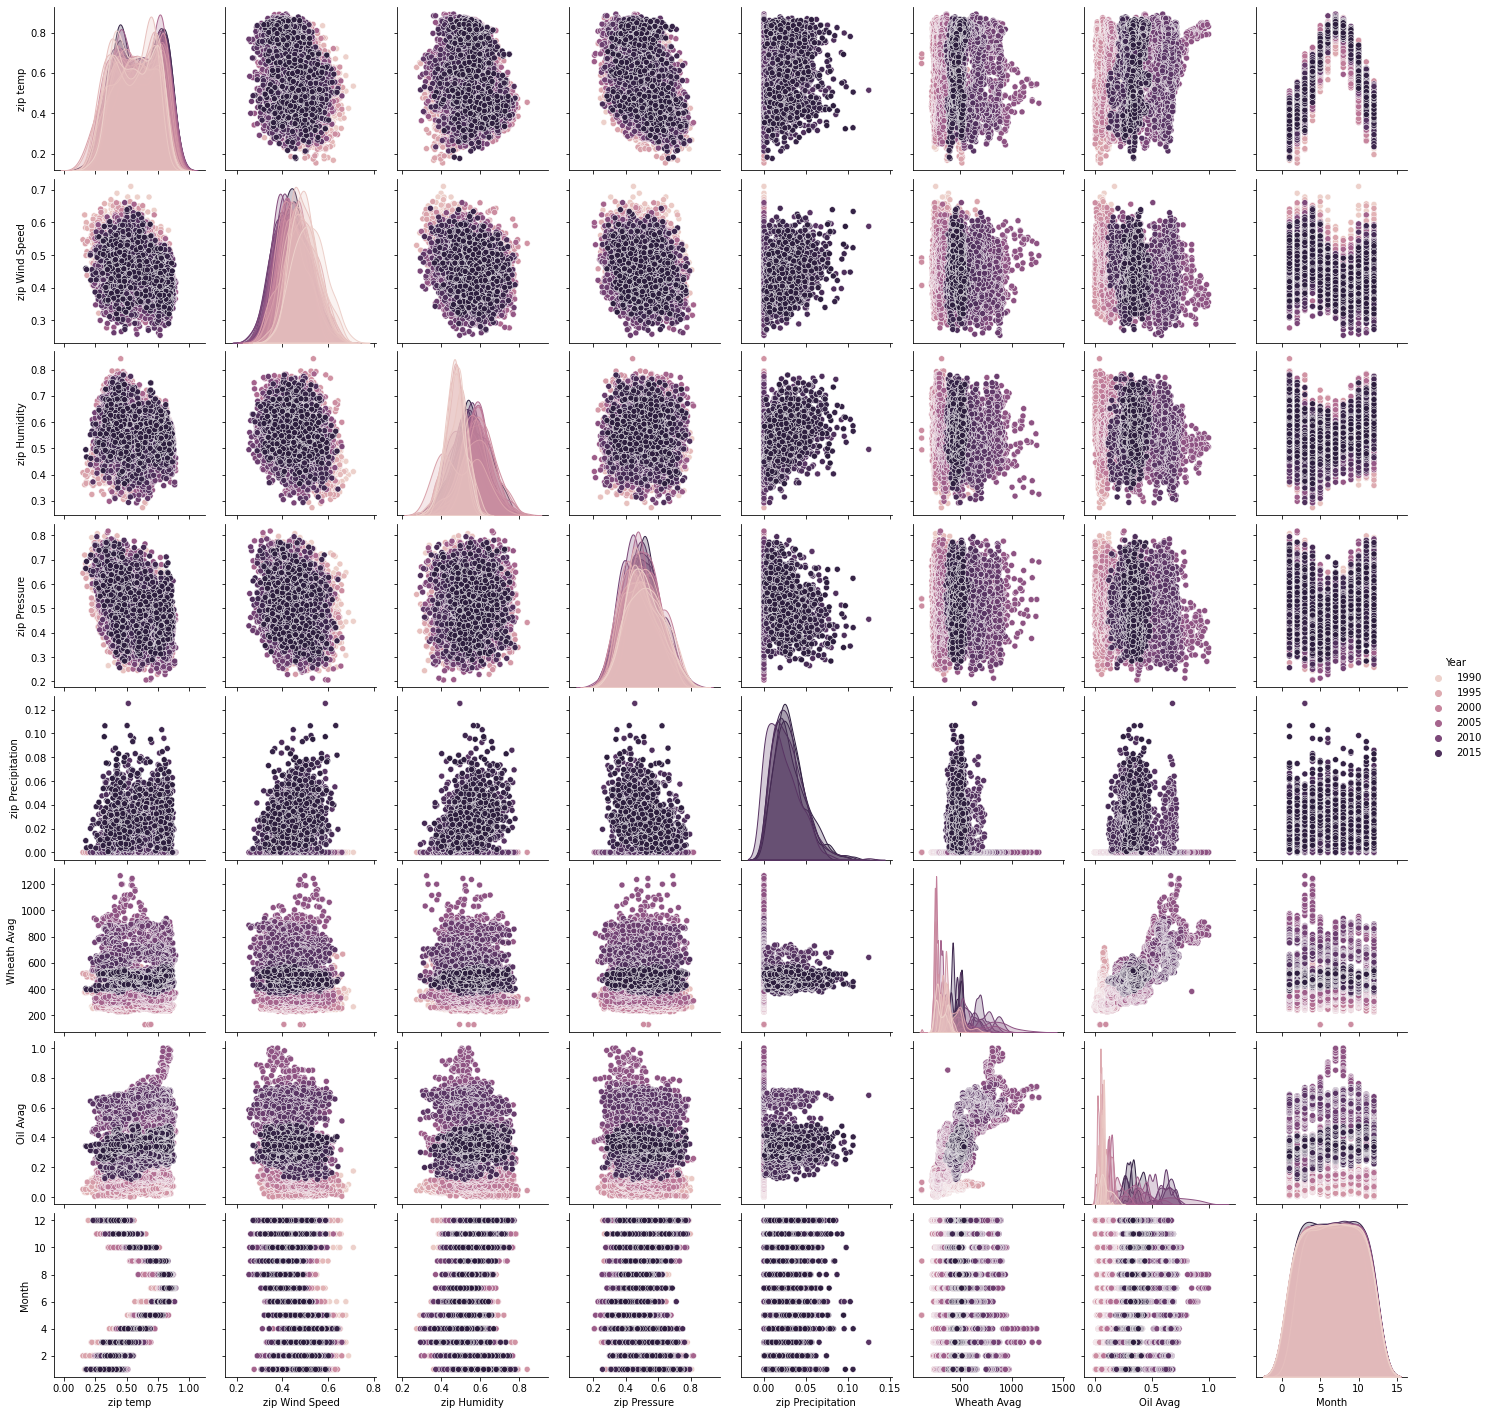

In [13]:
sns.pairplot(df_try, hue="Year")

coefficient of determination: 0.6449409487875114


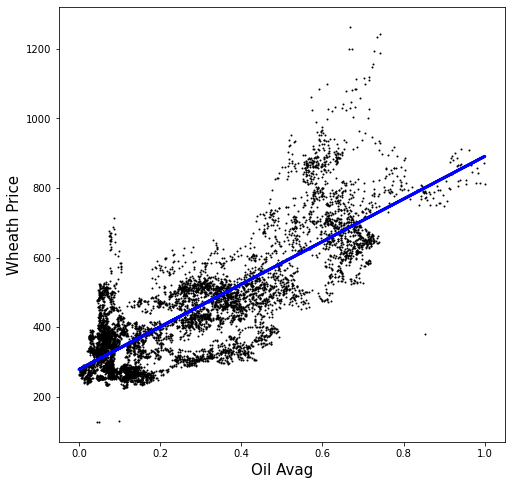

Slope: [612.88591804]
Intercept: 278.3343521968045
R2: 0.6449409487875114


In [49]:
# linear regression between oil and Wheath
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = np.array(df_try['Oil Avag']).reshape((-1, 1))

y =df_try['Wheath Avag']

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

plt.figure(figsize=(8, 8))

plt.scatter(x, y,  color='black',s = 1)
plt.plot(x, model.predict(x), color='blue', linewidth=3)

plt.xlabel('Oil Avag',fontsize = 15)
plt.ylabel('Wheath Price',fontsize = 15)
plt.show()

print("Slope:",model.coef_)
print("Intercept:",model.intercept_)
print("R2:",model.score(x,y))

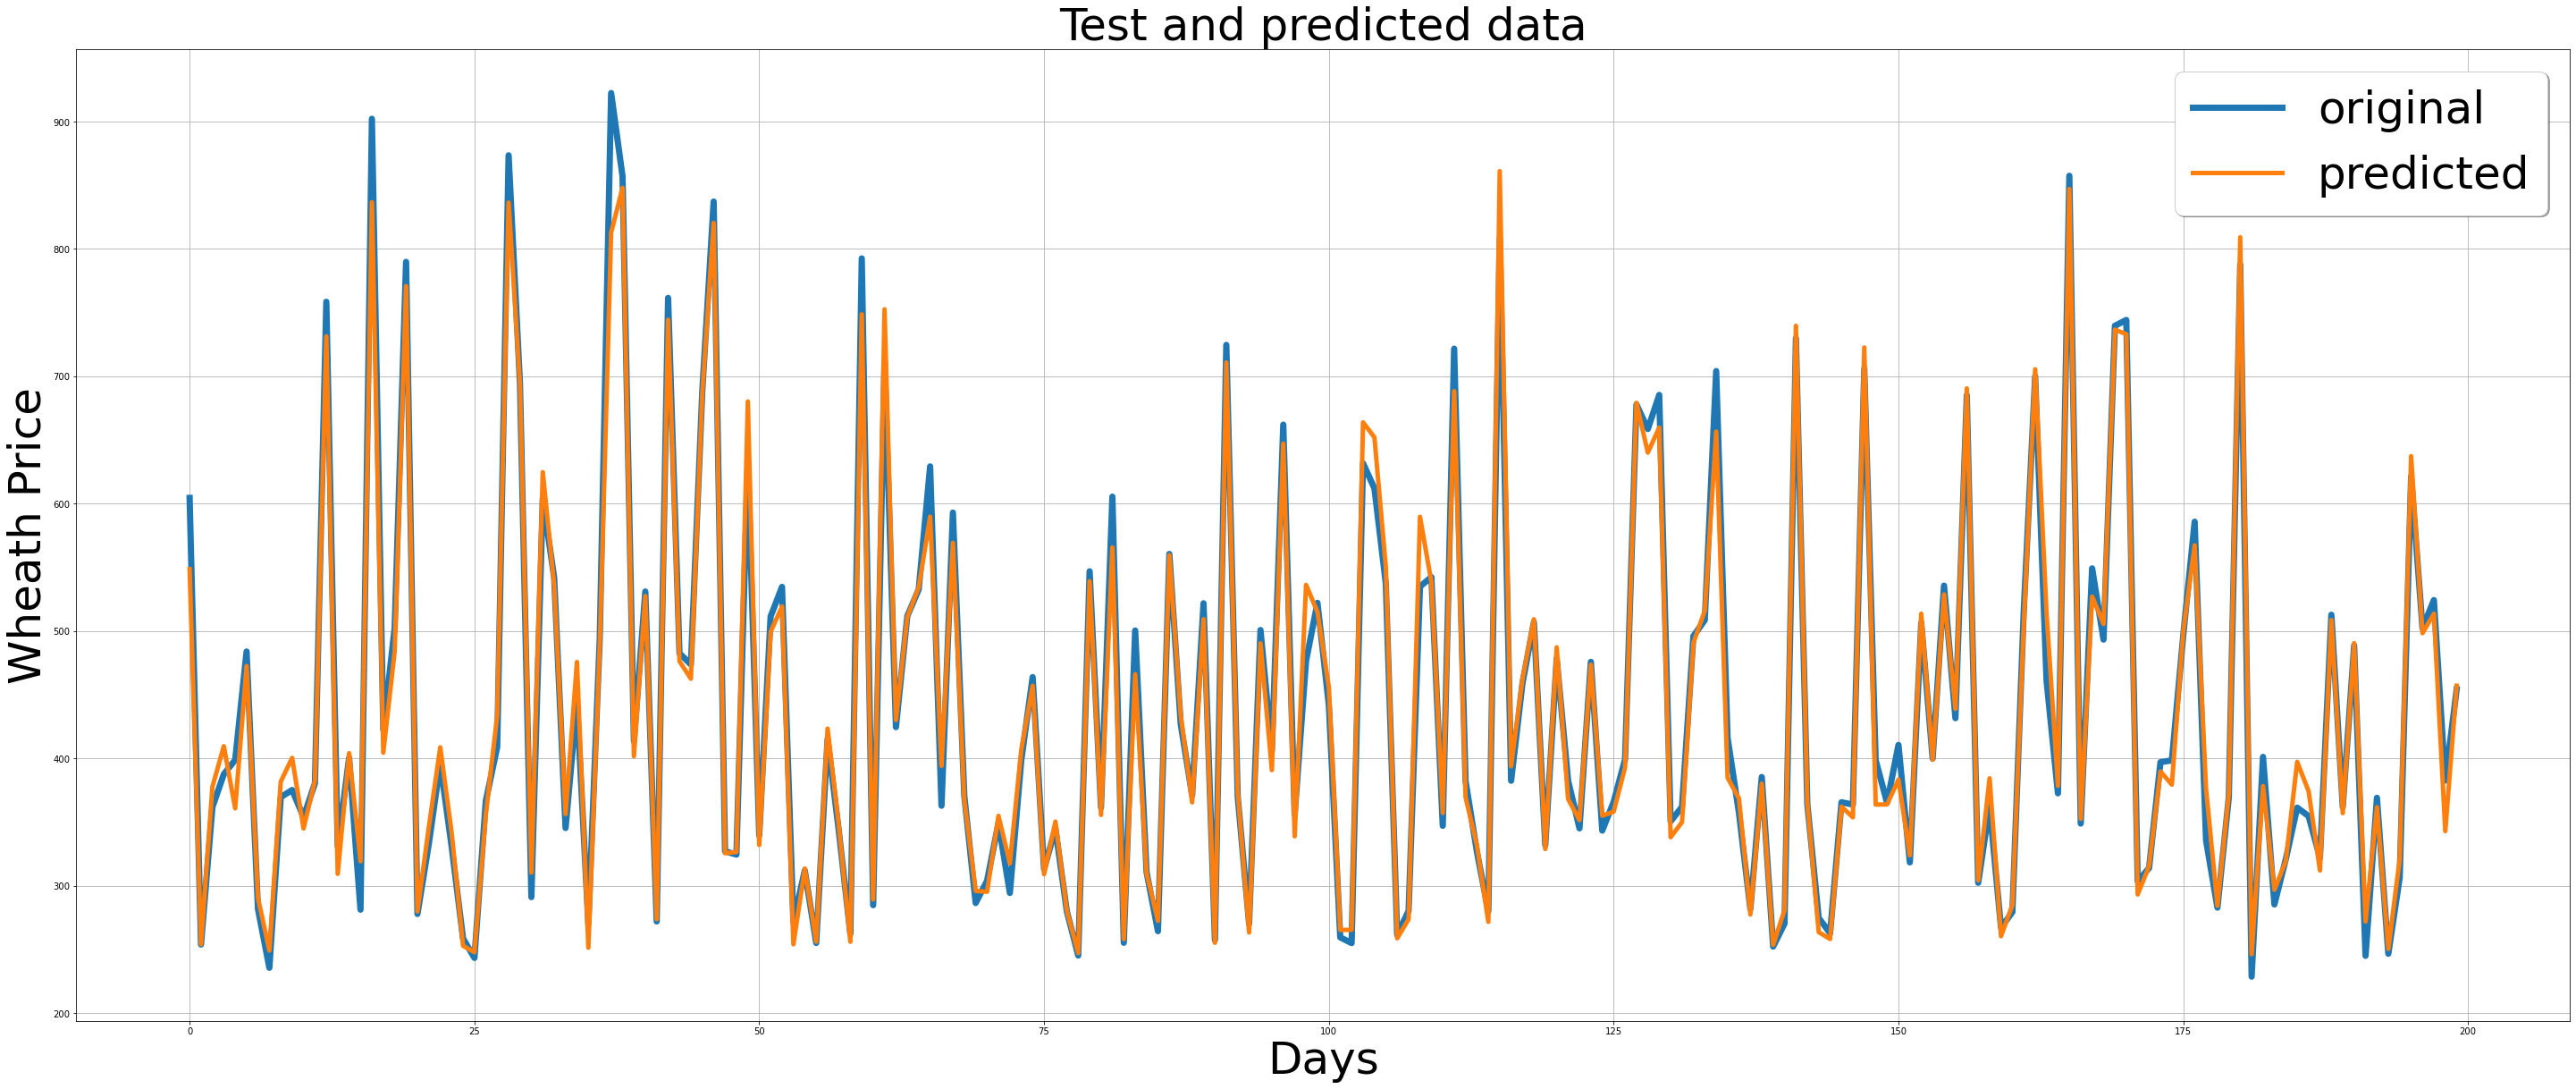

In [31]:
# A random forest is a meta estimator that fits a number
# of classifying decision trees on various sub-samples
# of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
# the end result is the differnce between the original values and the predicted ones
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import math

all_features = ["zip temp", "zip Wind Speed", "zip Humidity", "zip Pressure", "zip Precipitation", "Oil Avag","Month","Year"]

XTrain, XTest, yTrain, yTest = splitData(all_features)

forest =  RandomForestRegressor(bootstrap=True, n_estimators=150, random_state=0)

trained_forest = forest.fit(XTrain, yTrain) 

y_pred = trained_forest.predict(XTest)

plt.figure(figsize=(50,20))

x_ax = range(len(yTest[1000:1200]))
plt.plot(x_ax, yTest[1000:1200], label="original",linewidth=7)
plt.plot(x_ax, y_pred[1000:1200], label="predicted", linewidth=5)
plt.title("Test and predicted data",fontsize = 50)
plt.xlabel('Days',fontsize = 50)
plt.ylabel('Wheath Price',fontsize = 50)
plt.legend(loc='best',fancybox=True, shadow=True ,fontsize = 50)
plt.grid(True)
plt.show()

In [32]:
# Performance metrics
errors = abs(y_pred - yTest)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yTest)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 17.18 degrees.
Accuracy: 96.37 %.


In [33]:
# prediction is a function that gets unormalized values and prints the price that the machine learning process predicts
def prediction(temp,wind,humedity,preser,Precipitation,Oil,month,Year):
    temp /= 114.7257277
    wind /= 5.688250826
    humedity /= 132.7369556
    preser /= 47.78901604
    Oil /= 85.02835927
    
    ruzolt = trained_forest.predict([[temp,wind,humedity,preser,Precipitation,Oil,month,Year]]) 
    print(ruzolt)

In [34]:
prediction(36.9, 12.2, 73.1, 30.1,0,75.365,1,2022)
# y_pred = trained_forest.predict([[36.9,12.2,73.1,30.1,75.365,1]])
# y_pred 

[628.6743]


In [35]:
# df_try.drop(['zip Precipitation'], axis=1, inplace = True)
# df_try.drop(['Unnamed: 0'], axis=1, inplace = True)